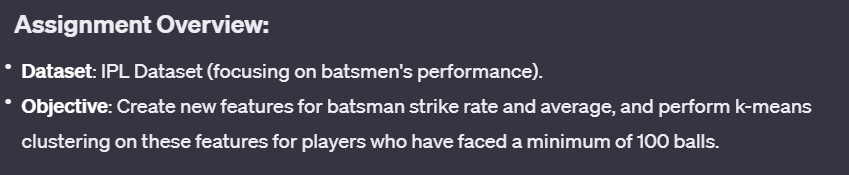

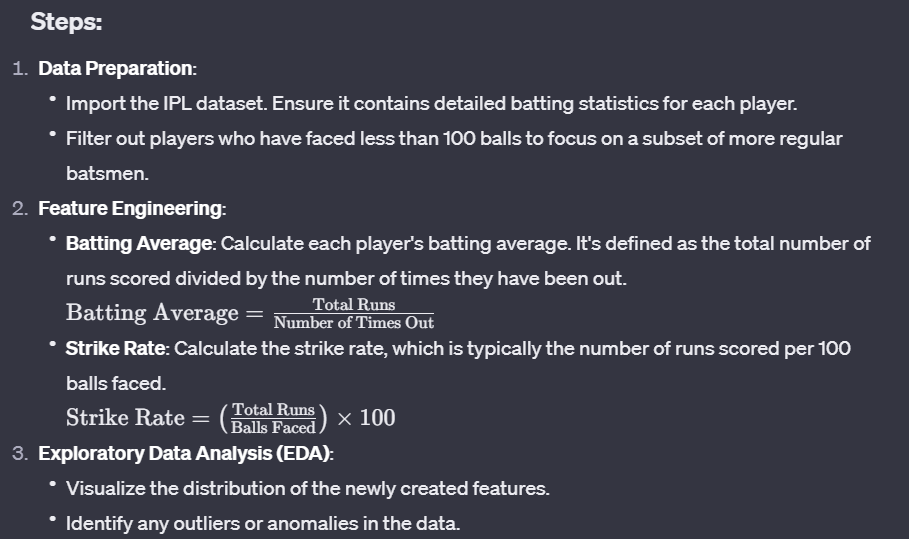

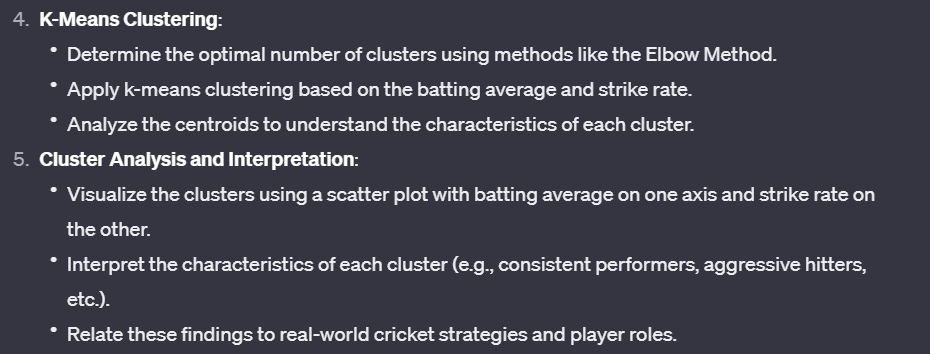

In [120]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

In [54]:
df = pd.read_csv("IPL_Ball_by_Ball_2008_2022.csv")
df.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


In [77]:
df.shape

(225954, 17)

In [78]:
df['batter'].value_counts()

V Kohli           5266
S Dhawan          5083
RG Sharma         4632
DA Warner         4313
SK Raina          4177
                  ... 
S Lamichhane         1
JL Denly             1
NJ Rimmington        1
Y Prithvi Raj        1
V Pratap Singh       1
Name: batter, Length: 605, dtype: int64

In [79]:
eligible_batsman = df['batter'].value_counts()[df['batter'].value_counts() > 100].index
eligible_batsman

Index(['V Kohli', 'S Dhawan', 'RG Sharma', 'DA Warner', 'SK Raina',
       'RV Uthappa', 'MS Dhoni', 'G Gambhir', 'CH Gayle', 'AB de Villiers',
       ...
       'SE Rutherford', 'RJ Quiney', 'UT Khawaja', 'AB McDonald', 'DJ Harris',
       'SL Malinga', 'B Lee', 'DJM Short', 'RD Chahar', 'DJ Jacobs'],
      dtype='object', length=265)

In [81]:
new_df = df[df['batter'].isin(eligible_batsman)]

In [83]:
new_df.shape

(215697, 17)

In [94]:
#average
runs_ser = new_df.groupby('batter')['batsman_run'].sum()
runs_ser

batter
A Ashish Reddy      280
A Badoni            161
A Mishra            362
A Symonds           974
AA Jhunjhunwala     217
                   ... 
YBK Jaiswal         547
YK Pathan          3222
YV Takawale         192
Yuvraj Singh       2754
Z Khan              117
Name: batsman_run, Length: 265, dtype: int64

In [87]:
# outs
out_ser = new_df['player_out'].value_counts()
out_ser

RG Sharma     194
V Kohli       182
RV Uthappa    180
S Dhawan      179
SK Raina      171
             ... 
SA Abbott       1
PV Tambe        1
LJ Wright       1
MS Gony         1
D Salunkhe      1
Name: player_out, Length: 311, dtype: int64

In [90]:
out_ser = out_ser[out_ser.index.isin(eligible_batsman)]

RG Sharma          194
V Kohli            182
RV Uthappa         180
S Dhawan           179
SK Raina           171
                  ... 
B Sai Sudharsan      4
NK Patel             4
DJ Harris            4
AC Voges             4
MN van Wyk           3
Name: player_out, Length: 265, dtype: int64

In [108]:
avg_df = (runs_ser/out_ser).reset_index().rename(columns = {'index':'batsman',0:'average'})
avg_df

,batsman,average
0,A Ashish Reddy,18.666667
1,A Badoni,20.125000
2,A Chopra,NaN
3,A Kumble,NaN
4,A Mishra,12.066667
...,...,...
306,YBK Jaiswal,23.782609
307,YK Pathan,29.559633
308,YV Takawale,24.000000
309,Yuvraj Singh,25.036364


In [109]:
balls_ser = new_df['batter'].value_counts()
balls_ser

V Kohli      5266
S Dhawan     5083
RG Sharma    4632
DA Warner    4313
SK Raina     4177
             ... 
DJ Harris     103
RD Chahar     102
B Lee         102
DJM Short     102
DJ Jacobs     101
Name: batter, Length: 265, dtype: int64

In [110]:
sr_df = ((runs_ser/balls_ser)*100).reset_index().rename(columns={'index':'batsman',0:'strike_rate'})
sr_df

,batsman,strike_rate
0,A Ashish Reddy,142.857143
1,A Badoni,115.827338
2,A Mishra,88.292683
3,A Symonds,124.711908
4,AA Jhunjhunwala,99.541284
...,...,...
260,YBK Jaiswal,133.414634
261,YK Pathan,138.046272
262,YV Takawale,104.918033
263,Yuvraj Singh,124.784776


In [111]:
final_df = avg_df.merge(sr_df,on='batsman')
final_df

,batsman,average,strike_rate
0,A Ashish Reddy,18.666667,142.857143
1,A Badoni,20.125000,115.827338
2,A Mishra,12.066667,88.292683
3,A Symonds,36.074074,124.711908
4,AA Jhunjhunwala,16.692308,99.541284
...,...,...,...
260,YBK Jaiswal,23.782609,133.414634
261,YK Pathan,29.559633,138.046272
262,YV Takawale,24.000000,104.918033
263,Yuvraj Singh,25.036364,124.784776


In [115]:
X = final_df.iloc[:,1:].values
X[10:20]

array([[ 24.66666667, 124.3697479 ],
       [ 23.35483871, 120.86811352],
       [ 29.98529412, 168.23432343],
       [ 24.9047619 , 123.3490566 ],
       [ 40.53846154, 131.75      ],
       [ 19.0952381 , 109.26430518],
       [ 17.68421053, 114.28571429],
       [ 30.86363636, 117.57575758],
       [ 14.125     , 118.94736842],
       [ 19.23728814, 123.50380849]])

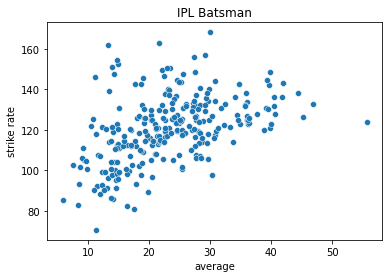

In [119]:
sns.scatterplot(X[:,0],X[:,1])
plt.title("IPL Batsman")
plt.xlabel("average")
plt.ylabel("strike rate")
plt.show()

<AxesSubplot:xlabel='average'>

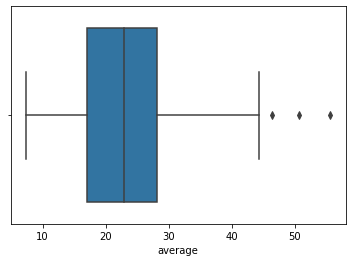

In [63]:
sns.boxplot(batsman_df['average'])

<AxesSubplot:xlabel='strike_rate'>

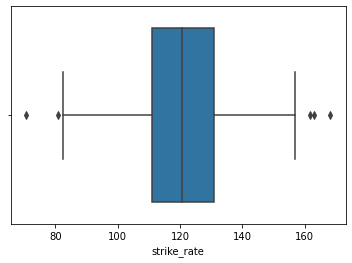

In [64]:
sns.boxplot(batsman_df['strike_rate'])

In [123]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1,11):
    kmeans = KMeans(n_init=10, n_clusters=i)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

<AxesSubplot:>

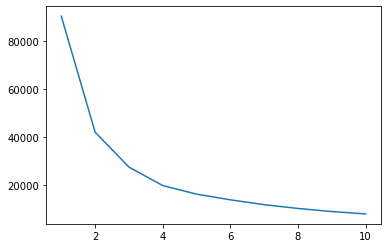

In [125]:
sns.lineplot(range(1,11),wcss)

In [127]:
kmeans = KMeans(n_init = 20, n_clusters=4)

In [130]:
y_kmeans = kmeans.fit_predict(X)

In [131]:
y_kmeans

array([1, 3, 0, 2, 0, 3, 3, 1, 2, 2, 3, 3, 1, 3, 2, 3, 3, 3, 3, 3, 3, 2,
       1, 2, 0, 3, 3, 0, 3, 2, 2, 2, 3, 1, 2, 2, 1, 3, 2, 3, 2, 0, 2, 1,
       3, 0, 2, 3, 1, 1, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 0, 2, 3,
       2, 0, 3, 0, 2, 3, 2, 0, 2, 3, 0, 3, 1, 3, 3, 1, 2, 3, 3, 3, 2, 3,
       1, 1, 1, 2, 3, 0, 3, 3, 2, 2, 1, 3, 2, 2, 2, 0, 1, 0, 1, 3, 2, 2,
       2, 2, 3, 2, 3, 2, 3, 0, 3, 2, 3, 3, 1, 0, 0, 0, 3, 3, 3, 3, 2, 2,
       0, 3, 2, 1, 0, 1, 1, 3, 3, 3, 2, 1, 0, 0, 2, 2, 3, 3, 2, 0, 2, 3,
       1, 0, 1, 2, 0, 0, 2, 3, 2, 0, 0, 3, 3, 0, 1, 3, 2, 1, 3, 0, 1, 2,
       3, 3, 3, 3, 0, 3, 1, 3, 2, 0, 3, 2, 0, 2, 3, 2, 0, 0, 3, 2, 1, 1,
       3, 0, 2, 1, 3, 3, 2, 2, 0, 3, 3, 3, 2, 0, 0, 2, 0, 2, 0, 0, 1, 2,
       3, 2, 3, 1, 3, 0, 1, 2, 3, 2, 2, 3, 2, 3, 2, 3, 3, 3, 3, 3, 2, 3,
       3, 3, 3, 2, 2, 0, 3, 0, 2, 1, 3, 3, 0, 0, 2, 3, 0, 3, 2, 2, 3, 2,
       0])

In [71]:
kmeans.cluster_centers_

array([[ 23.14543662, 146.70876356],
       [ 15.01364197,  96.96462841],
       [ 21.73487962, 117.94312222],
       [ 33.08056427, 130.2449319 ]])

In [133]:
X[y_kmeans == 0, 0]

array([12.06666667, 16.69230769, 14.33333333,  8.60714286, 20.52631579,
       16.33333333, 13.14285714, 17.28571429, 11.55555556,  7.59090909,
       18.3       , 14.2       , 13.25      , 14.53333333, 12.4       ,
       17.5       , 25.44444444, 14.38888889, 18.83333333, 17.85714286,
       12.84615385,  8.71428571, 12.38461538, 13.76923077, 13.71428571,
       14.        , 30.25      , 12.7       ,  9.44444444, 16.4       ,
       11.68      , 19.875     , 11.92307692,  9.        ,  9.75      ,
       14.71428571, 11.375     , 13.84615385, 18.71428571, 25.45283019,
       15.14285714, 11.        ,  5.86666667, 14.65      , 15.        ,
        9.83333333, 14.84210526, 16.25      , 20.35714286,  8.35714286])

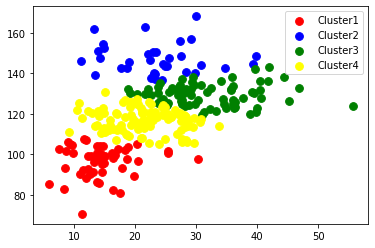

In [135]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 60, c = 'red', label = 'Cluster1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 60, c = 'blue', label = 'Cluster2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 60, c = 'green', label = 'Cluster3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 60, c = 'yellow', label = 'Cluster4')

plt.legend()

plt.show()